In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_csv("Laptop_price.csv")

In [4]:
df.shape

(1000, 7)

In [5]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [6]:
df.tail()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702


In [7]:
df["Processor_Speed"]=df["Processor_Speed"].astype(int)

In [8]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3,16,512,11.185147,2.641094,17395.093065
1,Acer,2,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3,4,256,11.853023,2.029061,9291.023542
3,Acer,3,16,512,12.280360,4.573865,17436.728334
4,Acer,3,32,1000,14.990877,4.193472,32917.990718


In [9]:
df["Screen_Size"]=df["Screen_Size"].astype(int)

In [10]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3,16,512,11,2.641094,17395.093065
1,Acer,2,4,1000,11,3.260012,31607.605919
2,Lenovo,3,4,256,11,2.029061,9291.023542
3,Acer,3,16,512,12,4.573865,17436.728334
4,Acer,3,32,1000,14,4.193472,32917.990718


In [11]:
df["Weight"]=df["Weight"].astype(int)

In [12]:
df["Price"]=df["Price"].astype(int)

In [13]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3,16,512,11,2,17395
1,Acer,2,4,1000,11,3,31607
2,Lenovo,3,4,256,11,2,9291
3,Acer,3,16,512,12,4,17436
4,Acer,3,32,1000,14,4,32917


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lbl_encoder=LabelEncoder()

In [16]:
df["Brand"]=lbl_encoder.fit_transform(df["Brand"])

In [17]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3,16,512,11,2,17395
1,0,2,4,1000,11,3,31607
2,4,3,4,256,11,2,9291
3,0,3,16,512,12,4,17436
4,0,3,32,1000,14,4,32917


## StandardScaler ##

In [18]:
x=df[["Brand","Processor_Speed","RAM_Size","Storage_Capacity",
      "Screen_Size","Weight"]]
y=df["Price"]

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [23]:
x_train.shape

(750, 6)

In [24]:
x_test.shape

(250, 6)

In [25]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [26]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [27]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [28]:
validation_score

array([-43669.87157992, -43878.10236468, -32458.62072231])

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
np.mean(validation_score)

np.float64(-40002.19822230195)

In [31]:
y_pred=regression.predict(x_test)

In [32]:
y_pred

array([11400.61243542, 18593.99541415, 11373.42171931, 17653.34726135,
       32929.01380835, 17835.76092498, 10678.24519   , 34117.40464456,
       19368.14477612,  9864.48231286, 33043.513314  ,  9978.98181851,
       32921.73843413, 32757.01189255, 10052.61627009,  9891.44504367,
       10260.43758392, 33255.23482646, 11651.16824233, 33102.7879734 ,
       10195.86157248, 18029.2332633 , 10844.5268122 , 17817.84581763,
       17830.83066877, 33927.90656297, 33427.04578601, 11375.20478523,
       32699.74828438, 11651.16824233, 33280.46233708, 10597.30915183,
       10190.56022044, 17887.95116641, 10774.42146342, 33167.36398483,
       33078.12251487, 18593.99541415, 32867.95608304, 11572.42339497,
       18208.49973664, 32587.21198422,  9862.69924694, 33493.58500294,
       10360.36012876, 32746.40918846, 19198.3448678 , 10197.45368215,
       10034.51020648, 32912.69081067, 18027.67818268, 34246.30097144,
       18067.21763976, 18238.800614  , 34307.53883634, 18029.42421955,
      

In [33]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1143636.0265613012
1035.805333333333
1069.409195098537


In [34]:
from sklearn.metrics import r2_score

In [35]:
score=r2_score(y_test,y_pred)
print(score)
##adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.986636256883442
0.9863062879176011


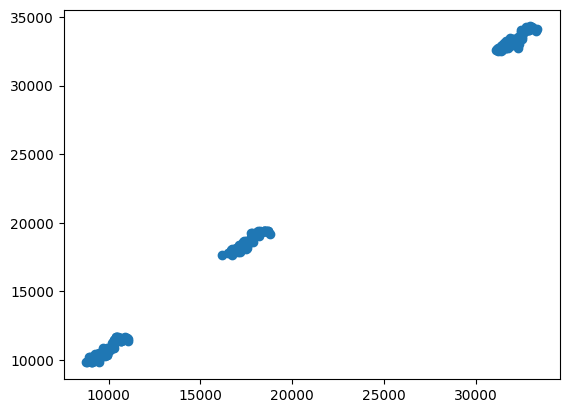

In [36]:
plt.scatter(y_test,y_pred)

## Lasso ##

In [37]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [38]:
lasso.fit(x_train,y_train)

Lasso()

mean absolute error 1035.805333333333
R2 score 0.9866408458200938


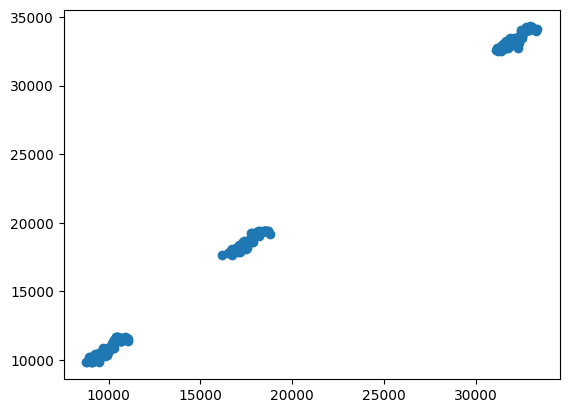

In [39]:
y_pred=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

## Ridge ##

In [40]:
from sklearn.linear_model import Ridge

mean absolute error 1035.8053333333332
R2 score 0.9866819501302507


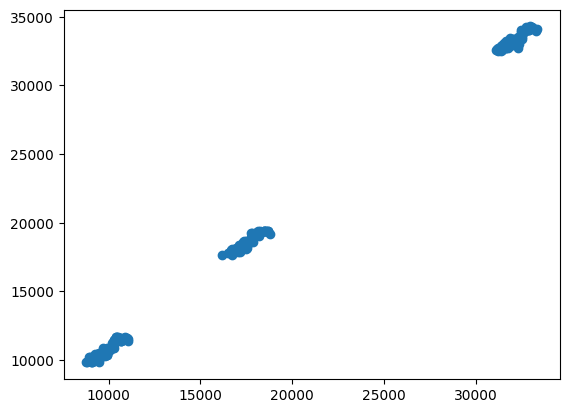

In [41]:
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

## Decision Tree ##

In [42]:
input=df.drop('Price',axis='columns')
target=df.Price

In [43]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3,16,512,11,2,17395
1,0,2,4,1000,11,3,31607
2,4,3,4,256,11,2,9291
3,0,3,16,512,12,4,17436
4,0,3,32,1000,14,4,32917


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(input,target,test_size=0.2)

In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [47]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [48]:
model.score(X_test,y_test)

0.9990431273820221

## Random Forest ##

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
model= RandomForestRegressor()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [52]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [53]:
model.score(x_test,y_test)

0.9994778489705776

## Adaboost ##

In [54]:
from sklearn.ensemble import AdaBoostRegressor

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
daModel=AdaBoostRegressor(estimator=100,
                            learning_rate=1)

In [57]:
adaboost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),
    n_estimators=100,
    random_state=42
)

In [58]:
adaboost_model.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=100, random_state=42)

In [59]:
model.score(x_test,y_test)

0.9994778489705776

In [60]:
import pickle

In [61]:
with open ('DT_model12','wb') as file :
  pickle.dump(model,file)

In [62]:
with open ('scaling','wb') as file :
  pickle.dump(scaler,file)